# <center>ANÁLISIS SOBRE LA PROBABILIDAD DE QUE UN CLIENTE NUEVO VUELVA A REALIZAR UN PEDIDO<br><br>Frubana<br><br>Luis Ángel Mazabuel García<br><br>21/07/2020</center>

# Introducción

Dentro de los intereses de toda empresa de servicios se encuentra un factor importante el cual apunta a su capacidad de encontrar, atraer, retener y fidelizar nuevos clientes interesados en su modelo empresarial. Dicho factor, en el caso del análisis actual para la empresa de interés <b>Frubana</b>, más que ser importante parece fundamental, ya que en la comprensión de una empresa StartUp resulta primordial la capacidad de mostrar el crecimiento en varios factores dentro de un tiempo relativamente corto. Y tal como ya se dijo uno de esos factores es la retención de clientes entre otros muchos.

Con esto mente, vale la pena para los intereses de la empresa preguntarse ¿qué estamos haciendo bien y qué no? Y a pesar de que responder esa pregunta puede ser algo sumamente complejo y profundo, se pretende acá dar un acercamiento a uno de los factores que pueden ayudar a resolver esta pregunta.

Pues conocer la probabilidad de que un cliente vuelva a realizar un pedido en la aplicación de Frubana, según la información que se considere relevante para responder esta pregunta, puede brindar un acercamiento por lo menos introductorio para la pregunta rectora que una empresa StartUp como Frubana, en su etapa de crecimiento y posicionamiento, necesita responderse.

# El modelo

Para este tipo de preguntas donde nuestra variable de respuesta es una probabilidad, se tiene entonces solamente dos opciones; para intereses computacionales esto se expresa como una variable de respuesta binaria donde o bien puede ser 1 (el cliente volvió a pedir despues de su primera orden con Frubana) o bien puede ser 0 (el cliente no volvió a pedir). Para calcular, pues, la probabilidad se puede utilizar modelos de regresión bien sea bajo métodologías tradicionales (regresiones lineales y no lineales, uni- o multi-ecuacionales) o bien bajo metodologías no tradicionales (modelos de Machine Learning). Para los intereses del análisis actual se modelará bajo metodologías tradicionales y no tradicionales y se compararán los resultados buscando obtener la mayor eficiencia posible bajo las diversas metodologías disponibles y así poder realizar luego la interpretación de los resultados obtenidos al conocer el mejor modelo.

# Información Seleccionada

### <center> Índice </center>

* ### User ID (UID)

Como para cualquier dataframe, tenemos el ID de usuario irrasteable por terceros no pertenecientes a Frubana como idenfiticador único.

### <center> Variables de Control </center>

* ### Segmento del usuario (SEGMENTO)

El Segmento hace referencia a el tipo de usuario registrado, los segmentos posibles son: Hogar, Comercio, Institución, Líderes de Comunidad, Restaurantes. Se espera que brinde información relevante sobre qué tipos de usuarios, según su segmento, son los que se pueden ver más interesados en continuar realizando pedidos en Frubana como también a cuáles ha afectado más la presencia de inconvenientes al recibir su orden.

* ### Ciudad (CIUDAD)

Dado que hasta la fecha Frubana tiene operación en 3 países: Colombia, México y Brasil; 4 ciudades: Bogotá, Barranquilla, Ciudad de México y Sao Pablo. Resulta interesante validar el comportamiento de los usuarios en cada una de estas ciudades. Por inconvenientes meramente informáticos, la información de Brasil (Sao Pablo) no se encontró disponible para alimentar el actual modelo, por lo tanto se utilizarán datos de Colombia y México solamente.

### <center> Variables Explicativas </center>

* ### Cantidad de Productos (PESO)

Para los distintos tipos de clientes que actualmente maneja Frubana, los intereses pueden variar en cada caso, mientras que algunas veces se necesita suplir lo que no hizo llegar otro proveedor, ahí entra Frubana a ofrecer sus productos; hay casos donde también se utiliza a Frubana como proveedor principal. Como esta información no está disponible y en realidad tampoco se espera esté disponible, se puede utilizar la Cantidad de productos solicitados en la orden como <b>Variable Proxy</b>. De esta manera la Cantidad de Productos será simplemente una variable cuantitativa y servirá para acercanos a conocer qué tipo de servicio espera el cliente de Frubana en su primera compra con nosotros.

* ### Subtotal de Compra (USD_SUBTOTAL)

Adicionalmente a la información anterior relevante a la cantidad de productos, el valor invertido en la compra también resulta relevante. Se utiliza el subtotal y no el total de la compra ya que el primero está excento de cargos y descuentos, por lo que tomar el segundo podría resultar engañoso e incluir ruido en el modelo. Además, se realiza una transformaición de la moneda del valor del subtotal bajo la nominación del Dólar Estadounidence considerando que dentro de nuestra información se tiene tanto a la moneda colombiana como a la moneda mexicana. De esta manera se asegura una estandarización de la variable.

* ### Descuentos sobre la orden (DESCUENTOS)

En este caso se tomará la información disponible en cada una de las primeras órdenes de los clientes respecto a los descuentos, atendiendo principalmente a si tuvieron descuentos o no. Es decir que esta variable será de tipo binaria donde: (1) significa que sí hubo algún descuento sobre la primera orden y (2) en caso contrario.

* ### Primera orden acompañada de orden de cortesía (CORTESIA)

Ya que el modelo de negocio de Frubana presta su principal interés sobre Restaurantes y negocios tales como establecimientos de Comercio, existe dentro de la fuerza comercial la posibilidad de ofrecer "<bi>Pedidos de Cortesía</bi> a los clientes (además del producto que compra se le envían un par de productos adicionales de un valor no muy significativo con el fin de generar una sensación positiva y enganchar al cliente). Así, al igual que con la información de la variable anterior, se tendrá en este caso una variable de tipo binaria donde: (1) cuando esa primera orden fue acompañada de alguna cortesía, (2) en caso contrario.

* ### Cancelación Previa (CANCEL_PREV)

En la experiencia del usuario en cualquier plataforma de domicilios la sensación del servicio obtenido resulta ser sumamente relevante. Esa "<i>primera impresión</i>" del usuario puede terminar siendo fundamental para determinar si continuará utilizando la aplicación, realizando pedidos, o si definitivamente perderá su interés en ella. Por ello, es del interés actual conocer si anteriormente a la primera orden satisfactoria del usuario hubo alguna cancelación; es decir, una experiencia que resulta efectivamente molesta y brinda una primera impresión negativa sobre el servicio obtenido. Sus valores posibles dentro de nuestros datos son: (1) si tuvo cancelaciones previas, (2) si no tuvo cancelaciones previas a su primera orden recibida.

* ### Productos Faltantes en la primera orden (FALTANTES)

Continuando sobre la experiencia del usuario, al momento en que este realiza una orden en la aplicación tiene toda la intención de que el producto seleccionado llegue en efecto al momento de recibir su entrega. En Frubana, por el motivo que fuere, se pueden presentar faltantes al momento de entregar el pedido al cliente. Sin importar el motivo logístico-tecnológico que responda a la causa de este hecho, el cliente normalmente queda con un estado de insatisfacción que Frubana intenta mitigar en gran medida. Y se sabe, por la experiencia en el servicio al cliente, que hay una relación directa entre la cantidad de faltantes en la orden y la insatisfacción del usuario con el servicio recibido. Por ello, esta variable será de tipo cuantitativo y servirá como proxy de dicha insatisfacción del usuario con su primer pedido.

* ### Cantidad Total de Reportes o Problemas sobre la primera orden (PQRs)

Teniendo en cuenta que el peso de la ausencia de un producto es superior a otros problemas posibles al momento de realizar la entrega, dentro de esta actual variable se incluye la cantidad de problemas reportados adicionales que no hacen referencia a producto faltante. Estos puede incluir desde demoras con la entrega hasta problemas con tecnología. Es una varibale cualitativa y también se considera relevante para la estimación del modelo.

* ### Diferencia entre hora de entrega deseada y hora de entrega real (DEMORA)

Finalmente dentro de nuestros datos se encuentra la diferencia en horas exactas entre la hora que puso el usuario como "Hora de Apertura/Atención a proveedores" y la hora en que el conductor marcó como "entregado" el pedido. A pesar de que la primera no significa la hora de entrega prometida por Frubana (especificado en los T&C claro está), hay que reconocer que la mayoría sino todos los clientes <b>desean</b> recibir su producto aproximadamente en esa hora. Por este motivo es la información que nos sirve para aproximar dicho indicador y así poder calcular la "demora" de la entrega en términos de espectativas por parte del usuario.

<b><i>La obtención de los datos, sus respectivos cálculos y transformaciones se realizaron leyendo la base de datos de Frubana bajo los lenguajes de consulta PostgreSQL y SQLite. <br> ACLARACIÓN AL LECTOR: La información observada en este trabajo es meramente investigativo y de carácter académico, no está permitida su divulgación total o parcial por parte de nadie ajeno a Frubana.</i></b>

# Importación de los Datos

In [1]:
# pip install xgboost

In [2]:
#conda install conda install python-graphviz

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree, plot_importance
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics 


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV

import graphviz

In [4]:
df = pd.read_csv("FrubanaData.csv")
#df['SEGMENTO'] = pd.Categorical(df['SEGMENTO'])
#df['CIUDAD'] = pd.Categorical(df['CIUDAD'])
#df['CANCEL_PREV'] = pd.Categorical(df['CANCEL_PREV'])
#df['DESCUENTOS'] = pd.Categorical(df['DESCUENTOS'])
#df['CORTESIA'] = pd.Categorical(df['CORTESIA'])
#df['VOLVIO'] = pd.Categorical(df['VOLVIO'])
print("")
print(df.dtypes)
print("")
df.describe()


SEGMENTO         object
CIUDAD           object
UID              object
CANCEL_PREV       int64
PESO            float64
USD_SUBTOTAL    float64
DESCUENTOS        int64
CORTESIA          int64
FALTANTES         int64
PQRs              int64
DEMORA            int64
VOLVIO            int64
dtype: object



,CANCEL_PREV,PESO,USD_SUBTOTAL,DESCUENTOS,CORTESIA,FALTANTES,PQRs,DEMORA,VOLVIO
count,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000
mean,0.010185,37.194491,36.904473,0.027218,0.118617,0.217740,0.188735,6.819427,0.746442
std,0.100410,46.034490,63.487202,0.162720,0.323343,0.737225,0.622301,2.382177,0.435055
min,0.000000,0.500000,0.400000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,0.000000,12.000000,18.590000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.000000,29.500000,27.770000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.000000,48.237500,40.860000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
max,1.000000,2700.000000,3933.750000,1.000000,1.000000,24.000000,22.000000,15.000000,1.000000


In [5]:
labels = df['SEGMENTO'].astype('category').cat.categories.tolist()
new_seg = {'SEGMENTO' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(new_seg, "")
df.replace(new_seg, inplace=True)

labels = df['CIUDAD'].astype('category').cat.categories.tolist()
new_city = {'CIUDAD' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(new_city, "")
df.replace(new_city, inplace=True)

df.head()

{'SEGMENTO': {'Comercio': 1, 'Hogar': 2, 'Institución': 3, 'Líderes de Comunidad': 4, 'Restaurante': 5}} 
{'CIUDAD': {'BAQ': 1, 'BOG': 2, 'CMX': 3}} 


,SEGMENTO,CIUDAD,UID,CANCEL_PREV,PESO,USD_SUBTOTAL,DESCUENTOS,CORTESIA,FALTANTES,PQRs,DEMORA,VOLVIO
0,5,2,001A3beZXUbwRsjHvrdJUPqHRmX2,0,82.40,56.15,0,1,0,0,5,1
1,5,2,001rRSk6sob6iN4mQHdRczU0Ynp2,0,5.00,15.15,0,0,0,0,6,1
2,2,2,009RfUy5UIVAdvnvWeR01sAyCLk2,0,79.40,80.60,0,0,0,0,7,0
3,5,3,00GrI29h5KcLlDVKIlfFfDPQAqd2,0,4.25,3.68,0,1,0,0,5,0
4,5,3,00KvH6PXE1couCpEEhu4ufHgWzj2,0,79.75,27.20,0,1,0,0,6,1


# Validación de la Muestra

### ¿Los Datos están balanceados?

Es importante validar si los datos están balanceados, es decir, que si dentro de nuestra muestra, tenemos la misma cantidad de registros para los casos en que el cliente realizó una segunda orden y los casos en que el cliente dejó de pedir en Frubana. Al garantizar una muestra balanceada se optimizan los resultados del modelo al reducir <b> bias and variance [Sesgo y Varianza]</b> de los datos lo cual añade, además, que el modelo resulte eficiente frente a problemas de <b>overfitting [sobre-estimación]</b>.

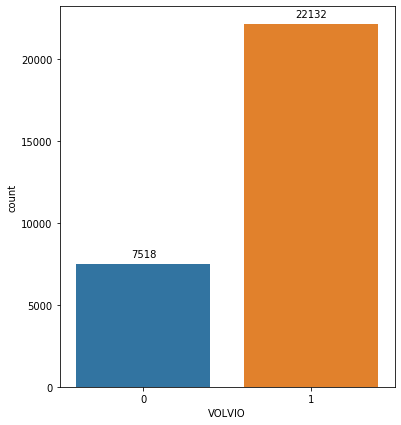

In [6]:
plt.figure(figsize=(6, 7))
splot = sns.countplot('VOLVIO', data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
               textcoords = 'offset points')

La muestra no está balanceada. De los 29659 usuarios, 22134 volvieron a pedir después de su primera orden y 7527 no volvieron a realizar un pedido. A pesar de que es una relación positiva para la empresa se observa que aún hay un gran porcentaje de usuarios <b> 25.4% </b> que dejan de usar la aplicación tras su primera compra. Para detectar qué puede estar sucediendo e intentar actuar sobre la solución se utilizará un método estadístico para balancear la muestra conocido como <b> Balanceo con muestra sintentica </b>, esta técnica se basa en técnicas de clasificación al modo de vecinos más cercanos.

In [7]:
y = df.VOLVIO
X = df.drop(['VOLVIO','UID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
sm = SMOTE(random_state=27, sampling_strategy=1)
X_train, y_train = sm.fit_sample(X_train, y_train)
np.array(np.unique(y_train, return_counts=True)).T

array([[    0, 17764],
       [    1, 17764]], dtype=int64)

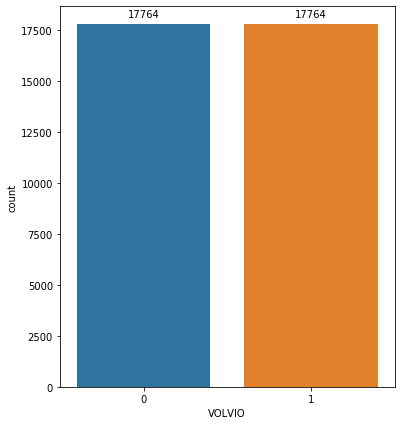

In [8]:
plt.figure(figsize=(6, 7))
splot = sns.countplot(y_train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
               textcoords = 'offset points')

# Creación de los modelos

Para que la creación de los modelos pudiera realizarse, unas líneas arriba se realizó la transformación de las categorías que estaban tipo texto (Ciudad y Segmento) ya que los siguientes modelos no reciben categorías o factores bajo tipologías de texto sino solamente numéricas.

### <center> Regresión Logística </center>

In [9]:
logit = LogisticRegression(solver='lbfgs')
logit_model = logit.fit(X_train,y_train)
logit_pred = logit_model.predict_log_proba(X_test)
logit_roc_auc = roc_auc_score(y_test, logit_pred[:,1])

C:\Users\NECSOFT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### <center> Ingenuo de Bayes [Naive Bayes] </center>

In [10]:
def hyperopt_train_test(params):
    clf = BernoulliNB(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4knn = {
    'alpha': hp.uniform('alpha', 0.0, 2.0)
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|█████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47trial/s, best loss: -0.6389906815720844]
best:
{'alpha': 1.8669006929140965}


In [11]:
NaiveBayes = BernoulliNB(alpha = best.get('alpha'))
NB_model = NaiveBayes.fit(X_train,y_train)
NB_pred = NB_model.predict_proba(X_test)
NB_roc_auc = roc_auc_score(y_test, NB_pred[:,1])

### <center> Árbol de Decisión [Decision Tree (DT)] </center>

In [12]:
def hyperopt_train_test(params):
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|█████████████████████████████████████████████| 100/100 [00:24<00:00,  4.12trial/s, best loss: -0.7074428425057533]
best:
{'criterion': 0, 'max_depth': 18, 'max_features': 3}


In [13]:
DT = DecisionTreeClassifier(criterion = 'gini' if best.get('criterion') == 0 else 'entropy', max_depth = best.get('max_depth'), max_features = best.get('max_features'))
DT.fit(X_train,y_train)
DT_pred = DT.predict_proba(X_test)
DT_roc_auc = roc_auc_score(y_test, DT_pred[:,1])

### <center> Bosque Aleatorio [Random Forest (RF)] </center>

In [14]:
def hyperopt_train_test(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|██████████████████████████████████████████████| 100/100 [02:32<00:00,  1.52s/trial, best loss: -0.740347123175289]
best:
{'criterion': 0, 'max_depth': 18, 'max_features': 3, 'n_estimators': 15}


In [15]:
RF = RandomForestClassifier(criterion = 'gini' if best.get('criterion') == 0 else 'entropy', max_depth = best.get('max_depth'), max_features = best.get('max_features'), n_estimators = best.get('n_estimators'))
RF.fit(X_train,y_train)
RF_pred = RF.predict_proba(X_test)
RF_roc_auc = roc_auc_score(y_test, RF_pred[:,1])

### <center> Aumento del Gradiente [Gradient Boosting (GB)] </center>

In [16]:
def hyperopt_train_test(params):
    clf = GradientBoostingClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1))}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|█████████████████████████████████████████████| 100/100 [16:21<00:00,  9.82s/trial, best loss: -0.7603879050382732]
best:
{'learning_rate': 0.6891098054534388, 'max_depth': 18, 'max_features': 2, 'n_estimators': 16}


In [17]:
GB = GradientBoostingClassifier(learning_rate = best.get('learning_rate'), max_depth = best.get('max_depth'), max_features = best.get('max_features'), n_estimators = best.get('n_estimators'))
GB.fit(X_train, y_train)
GB_pred = GB.predict_proba(X_test)
GB_roc_auc = roc_auc_score(y_test, GB_pred[:,1])

### <center> XgBoost </center>

In [18]:
def hyperopt_train_test(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1))
}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|█████████████████████████████████████████████| 100/100 [03:22<00:00,  2.02s/trial, best loss: -0.7513809523149304]
best:
{'learning_rate': 0.8807360564951826, 'max_depth': 15, 'n_estimators': 15}


In [19]:
XGB=xgb.XGBClassifier(learning_rate = best.get('learning_rate'), max_depth = best.get('max_depth'), n_estimators = best.get('n_estimators'))
XGB.fit(X_train,y_train)
XGB_pred=XGB.predict_proba(X_test)
XGB_roc_auc=roc_auc_score(y_test,XGB_pred[:,1])

# Comparación de los modelos

Para que la creación de los modelos pudiera realizarse, unas líneas arriba se realizó la transformación de las categorías que estaban tipo texto (Ciudad y Segmento) ya que los siguientes modelos no reciben categorías o factores bajo tipologías de texto sino solamente numéricas.

<h3><b> AUC </b></h3>

Ahora bien, para realizar la comparación de los modelos se revisará el rendimiento de cada modelo bajo el cálculo de la <b> Curva de de Característica Operativa del Recepto (ROC curve)</b> de manera que el modelo que alcance el mayor valor respecto a la <b>Tasa de Verdaderos Positivos (TPR)</b> frente a la <b>Tasa de Falsos Positivos(FPR)</b> en la curva de decisión será tomado como el modelo que mejor pronostica la variable de respuesta binaria en nuestro caso.

No obstante, revisar cada asignación de decisión posible en el <b>trade-off</b> entre la <b>TPR</b> y la <b>(FPR)</b> sería ineficiente. Por ello se procede a añadir el <b>Área Bajo la curva ROC (Under ROC curve Area - AUC)</b> mediante la cual se puede medir toda el área bidimensional por debajo de la curva ROC. El valor resultante para el <b>AUC</b> será interpretado como la probabilidad de que cada modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. Es decir, un modelo cuyas predicciones siempre resultan incorrectas tiene un <b>AUC</b> de 0, mientras que otro modelo cuyas predicciones siempre resultan correctas tiene un <b>AUC</b> de 1.

In [20]:
def MeanSquareError(y_obs, y_pred):
    ''' This function calculates efficiency of any model 
    y_pred: estimate value
    y_obs: real value 
    # '''
    mse = pow(y_obs - y_pred, 2).sum() / y_obs.shape[1]
    return mse

print('     Modelo        ', '  AUC Value')
print('Regresión Logit  : ',logit_roc_auc)
print('Naïve Bayes      : ',NB_roc_auc   )
print('Árbol de decisión: ',DT_roc_auc   )
print('Random Forest    : ',RF_roc_auc   )
print('Gradient Boosting: ',GB_roc_auc   )
print('Xg Boost:          ',XGB_roc_auc  )

     Modelo           AUC Value
Regresión Logit  :  0.6571559309235365
Naïve Bayes      :  0.5921626055869014
Árbol de decisión:  0.661394796518036
Random Forest    :  0.7161322392396337
Gradient Boosting:  0.6865387400158527
Xg Boost:           0.6988678868080277


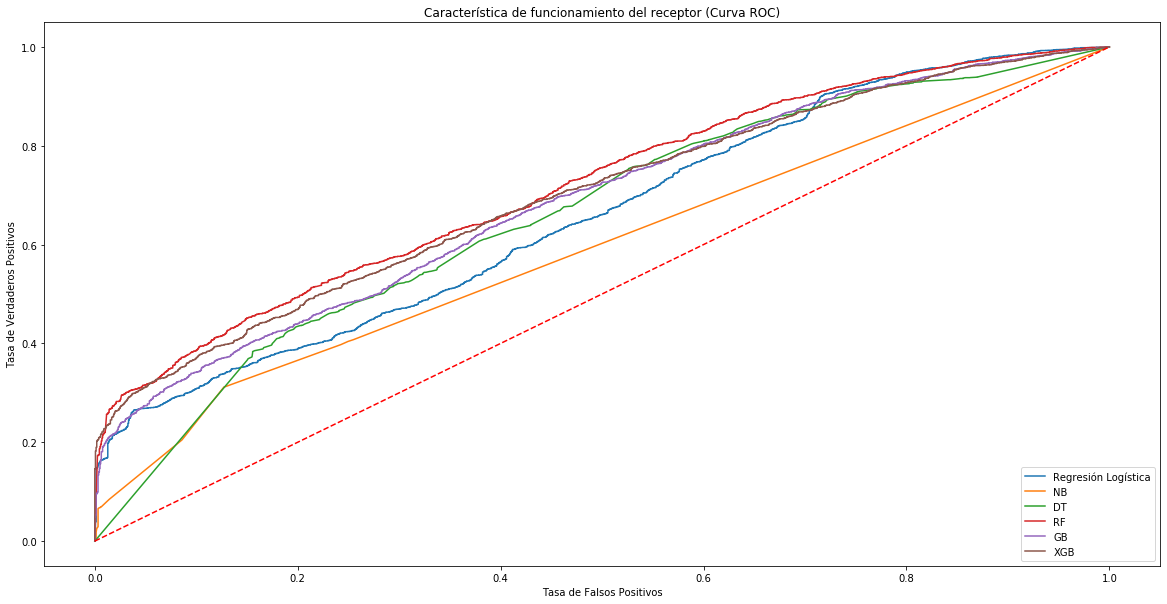

In [21]:
logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logit_pred[:,1])
NB_fpr, NB_tpr, thresholds       = roc_curve(y_test, NB_pred[:,1])
DT_fpr, DT_tpr, thresholds       = roc_curve(y_test, DT_pred[:,1])
RF_fpr, RF_tpr, thresholds       = roc_curve(y_test, RF_pred[:,1])
GB_fpr, GB_tpr, thresholds       = roc_curve(y_test, GB_pred[:,1])
XGB_fpr, XGB_tpr, thresholds     = roc_curve(y_test, XGB_pred[:,1])

plt.figure(figsize=(20,10))
plt.plot(logit_fpr, logit_tpr, label='Regresión Logística')
plt.plot(NB_fpr, NB_tpr, label='NB')
plt.plot(DT_fpr, DT_tpr, label='DT')
plt.plot(RF_fpr, RF_tpr, label='RF')
plt.plot(GB_fpr, GB_tpr, label='GB')
plt.plot(XGB_fpr, XGB_tpr, label='XGB')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")

# Interpretación de resultados

Tras modelar y comparar los resultados se observa que el segundo modelo con mayor rendimiento fue GradientBoosting el cual tiene como base un solo árbol de decisión pequeño/corto (pocas ramificaciones/nodos = alto sesgo, baja varianza). Este se basa en un método iterativo que aprovecha la lectura del error del árbol pequeño con el que se trabaja inicialmente para, en cada iteración, aprender secuencialmente del error anterior. Con base en esto, el modelo se concentra en minimizar el sesgo. 

Sin embargo, el modelo ganador fue XGBoost el cual es una variante semejante a GradientBoosting. De hecho, GradientBoosting es la base teórica de XGBoost; la diferencia radica en que el modelo XGBoost se especializa en trabajar con datos con valores atípicos (con alta varianza) mientras que trabaja en minimizar el sesgo. El modelo GradientBoosting es débil frente a los valores atípicos, por lo cual la relevancia de las variables se iba a ver sesgadas seleccionando GradientBoosting dada su falibilidad frente a este tipo de valores. 

### Importancia de las variables en los 2 mejores modelos

Continuando con lo que se mencionaba sobre la diferencia de ambos modelos se puede observar además dicha diferencia al revisar la relevancia relativa de cada variable dentro del modelo. 

Text(0.5, 1.0, 'Importancia de las Variables en el Modelo (GB)')

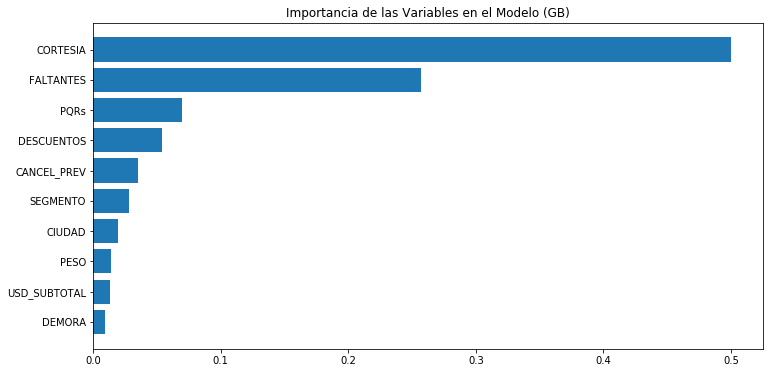

In [22]:
feature_importance = XGB.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Importancia de las Variables en el Modelo (GB)')

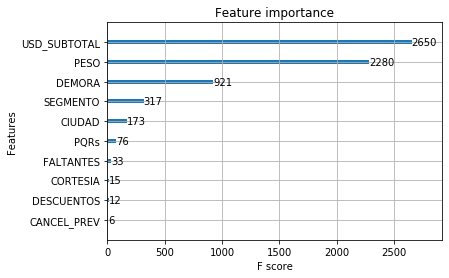

In [23]:
plot_importance(XGB)

Como es visible en las anteriores dos gráficas, el modelo GradientBoosting (GB) la relevancia de las variables es muy distinta a la del modelo XGBoost (XGB), se observa que en el primero la cantidad de productos según su peso (PESO) y el costo en dólares comprado (USD_SUBTOTAL) son casi irrelevantes para el modelo. Mientras que esto se vuelve sumamente relevante para el modelo XGB lo cual se puede entender por lo mencionado anteriormente sobre que este último modelo es robusto frente a datos atípicos y alta varianza, lo cual está presente con claridad en aquellas dos variables que además de presentar esta particularidad son sumamente importantes para determinar si un usuario volverá a realizar un pedido o no.

Finalmente la siguiente celda crea el árbol de decisión resultante del mejor modelo XGB donde se puede validar las condiciones segun las cuales el modelo indica la probabilidad de que un cliente deje de realizar compras tras su primera orden o se mantenga comprando en Frubana.

In [24]:
def plot_tree(xgb_model, filename, rankdir='UT'):
    """
    Plot the tree in high resolution
    :param xgb_model: xgboost trained model
    :param filename: the pdf file where this is saved
    :param rankdir: direction of the tree: default Top-Down (UT), accepts:'LR' for left-to-right tree
    :return:
    """
    import os
    gvz = xgb.to_graphviz(xgb_model, num_trees=0, rankdir=rankdir)
    _, file_extension = os.path.splitext(filename)
    format = file_extension.strip('.').lower()
    data = gvz.pipe(format=format)
    full_filename = filename
    with open(full_filename, 'wb') as f:
        f.write(data)
        
plot_tree(XGB, 'ARBOL.pdf')